In [1]:
"""
Read and plot ComptonSoft data file
Aur: Jiancheng Zeng
Date: Oct 5, 2023
"""

'\nRead and plot ComptonSoft data file\nAur: Jiancheng Zeng\nDate: Oct 5, 2023\n'

Welcome to JupyROOT 6.26/10


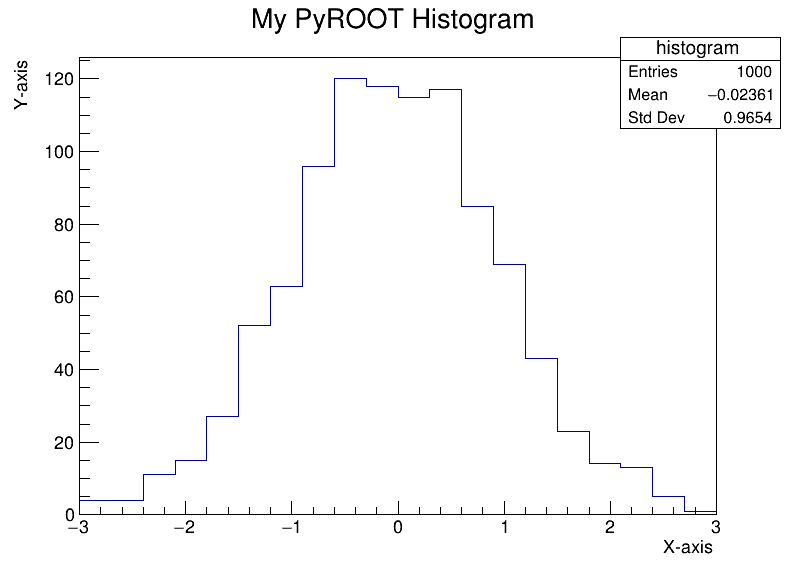

In [2]:
import ROOT
import numpy as np
from ROOT import TCanvas, TH1F

# Initialize the PyROOT environment
ROOT.gROOT.Reset()

# Create some sample data
data = np.random.normal(0, 1, 1000)  # Generate 1000 random numbers with a mean of 0 and standard deviation of 1

# Create a TH1F (1D histogram) to hold the data
histogram = TH1F("histogram", "My Histogram", 20, -3, 3)  # 20 bins from -3 to 3

# Fill the histogram with the sample data
for value in data:
    histogram.Fill(value)

# Create a canvas to draw the histogram
canvas = TCanvas("canvas", "PyROOT Histogram", 800, 600)

# Customize the appearance of the histogram
histogram.SetTitle("My PyROOT Histogram")
histogram.GetXaxis().SetTitle("X-axis")
histogram.GetYaxis().SetTitle("Y-axis")

# Draw the histogram on the canvas
histogram.Draw()

# Show the canvas in the Jupyter Notebook
from ROOT import gROOT
gROOT.GetListOfCanvases().Draw()


In [ ]:
import ROOT

# Specify the path to your ROOT file
file_path = "/home/jiancheng/GRAMS/Random_notebooks/ComptonSoft_testdata.root"

try:
    file = ROOT.TFile.Open(file_path, "READ")
    if not file.IsOpen():
        print("Failed to open the file.")
    else:
        # Get the TTree named "hittree" from the file
        tree = file.Get("hittree")

        if not tree:
            print("TTree 'hittree' not found in the file.")
        else:
            # Access the TBranch "ihit"
            branch = tree.GetBranch("ihit")
            
            if not branch:
                print("TBranch 'ihit' not found in the TTree.")
            else:
                # Create a TH1F (1D histogram) to hold the data
                histogram = ROOT.TH1F("ihit_histogram", "Histogram of ihit", 20, -10, 10)  # Adjust the range and binning

                # Loop through the entries and fill the histogram
                for entry in range(tree.GetEntries()):
                    branch.GetEntry(entry)
                    ihit_value = branch.GetLeaf("ihit").GetValue()
                    histogram.Fill(ihit_value)

                # Create a canvas to display the histogram
                canvas = ROOT.TCanvas("canvas", "ihit Histogram", 800, 600)

                # Draw the histogram
                histogram.Draw()

                # Show the canvas
                canvas.Update()
                canvas.Modified()

                # Run the event loop to display the canvas
                ROOT.gApplication.Run()

        file.Close()
except Exception as e:
    print(f"Error: {str(e)}")

